<a href="https://colab.research.google.com/github/farhadfarokhseresht/Time-Series-Forecasting-in-Python-ARIMA-model-/blob/main/Time_Series_Forecasting_in_Python_(_ARIMA_model_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to ARIMA Models**

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

An ARIMA model is characterized by 3 terms: `p, d, q`

where,

* `p` is the order of the AR term

* `q` is the order of the MA term

* `d` is the number of differencing required to make the time series stationary


The **first step** to build an ARIMA model is to make the time series stationary.

The most common approach is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

Why?

Because, term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

**What does the p, d and q in ARIMA model mean**

The **value** of **`d`**, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then**` d = 0.`**

**`‘p’`** is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. And **`‘q’`** is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

**How to find the order of differencing (d) in ARIMA model**

requirements - پیش نیازها

In [1]:
import pandas as pd
import os
import glob
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
# plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':60})

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read & Preprocessing Data
خواندن و آماده سازی داده ها


In [ ]:
xls = pd.ExcelFile('path_to_file.xls')
df1 = pd.read_excel(xls, 'Sheet1')
df2 = pd.read_excel(xls, 'Sheet2')

In [3]:
# use glob to get all the xlsx files
# in the folder
path = os.getcwd()
xlsx_files = glob.glob(os.path.join(path, "*.xlsx"))
frames = []
# loop over the list of xlsx files 
for f in xlsx_files:
    # read the xlsx file
    df = pd.read_excel(f)
    df['Year'] = int(f[f.index('.')-4:f.index('.')])
    df['state'] = f[f.find('t/')+2:f.index('2')]
    frames.append(df)

data = pd.concat(frames)
# Export
Export = data[data.state == 'Export']
Export =  Export[['principle','TEUs','Year']]
Export = Export.rename(columns={"principle": "bandar"})
# Importation
Importation = data[data.state != 'Export']
Importation =  Importation[['Destination','TEUs','Year']]
Importation = Importation.rename(columns={"Destination": "bandar"})

In [ ]:
Export = Export.groupby(['bandar','Year']).sum()
Export['type'] = 'Export'
Importation = Importation.groupby(['bandar','Year']).sum()
Importation['type'] = 'Importation'
data = pd.concat([Export,Importation])
data = data.reset_index()
data.Year = data.Year.map(lambda x: str(x)+'-01-01')
data

# Data analysis (model identification)
 تجزیه و تحلیل داده ها  ( شناسایی مدل ) 

In [5]:
banader = set(data.bandar)
banader

{'Asaluyeh Port', 'Bushehr Port', 'Ganaveh Port'}

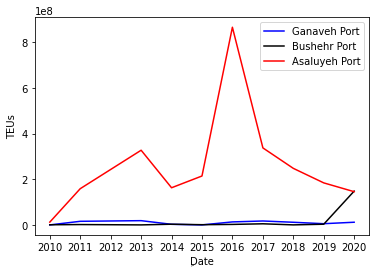

In [6]:
# Export plot
option  = {'Asaluyeh Port':['red','o'], 'Bushehr Port':['black','*'], 'Ganaveh Port':['blue','x']}
for item in banader:
  optionset = option[item]
  port = item
  typ = 'Export'
  df = data[data.bandar== port]
  df = df[df['type']==typ]
  # Changing the datatype
  df.Year = df.Year.astype('datetime64[ns]')
  pd.to_datetime(df.index, format = '%Y/%m/%d')
  # Setting the Date as index
  df = df.set_index("Year")
  # plot
  plt.plot(df["TEUs"], color =optionset[0],label= item)

# Labelling 
plt.xlabel("ِDate")
plt.ylabel("TEUs")
plt.legend()

plt.show() 

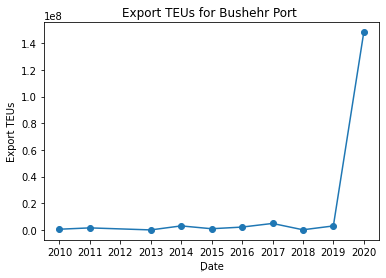

In [7]:
# Export - Bushehr Port
port = 'Bushehr Port'
typ = 'Export'


df = data[data.bandar== port]
df = df[df['type']==typ]

# Changing the datatype
df.Year = df.Year.astype('datetime64[ns]')
# Setting the Date as index
df = df.set_index("Year")
# Plot
plt.plot(df["TEUs"], marker='o')
# Labelling 
plt.xlabel("ِDate")
plt.ylabel("{} TEUs".format(typ))
plt.title("{} TEUs for {} ".format(typ,port))

# Display

plt.show()

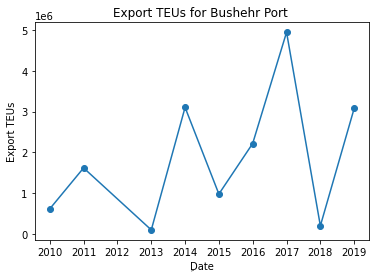

In [8]:
df= df.drop('2020-01-01')
# Plot
plt.plot(df["TEUs"], marker='o')
# Labelling 
plt.xlabel("ِDate")
plt.ylabel("{} TEUs".format(typ))
plt.title("{} TEUs for {} ".format(typ,port))

# Display

plt.show()

In [ ]:
# import modules
import numpy as np
from scipy import stats
 
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
 
# generate non-normal data (exponential)
original_data = df["TEUs"]
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [30]:
df

,bandar,TEUs,type
Year,,,
2010-01-01,Bushehr Port,611471.0,Export
2011-01-01,Bushehr Port,1615600.0,Export
2013-01-01,Bushehr Port,93900.0,Export
2014-01-01,Bushehr Port,3101348.0,Export
2015-01-01,Bushehr Port,975064.0,Export
2016-01-01,Bushehr Port,2215095.0,Export
2017-01-01,Bushehr Port,4946747.0,Export
2018-01-01,Bushehr Port,194430.0,Export
2019-01-01,Bushehr Port,3075466.0,Export


In [107]:
# df["TEUs"] = original_data
# # Plot
# plt.plot(df["TEUs"], marker='o')
# # Labelling 
# plt.xlabel("ِDate")
# plt.ylabel("{} TEUs".format(typ))
# plt.title("{} TEUs for {} ".format(typ,port))

# # Display

# plt.show()

**find the order of differencing (d) in ARIMA model**

So how to determine the right order of differencing?

The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

we check if the series is stationary using the Augmented Dickey Fuller test (`adfuller()`), from the **statsmodels** package.

Because, you need differencing only if the series is non-stationary. Else, no differencing is needed, that is, `d=0`.

https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary

So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

In [9]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.TEUs.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.184659
p-value: 0.680160


Since P-value is greater than the significance level, let’s difference the series and see how the autocorrelation plot looks like.

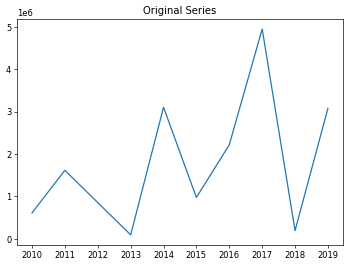

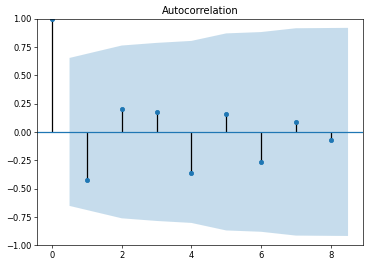

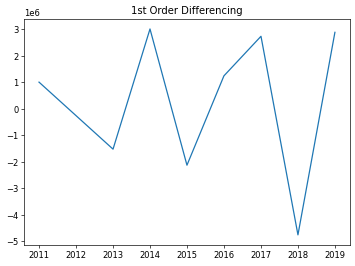

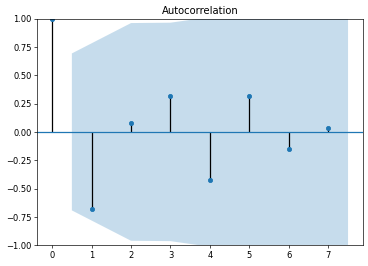

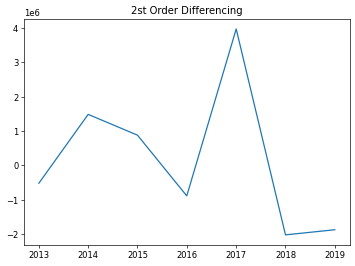

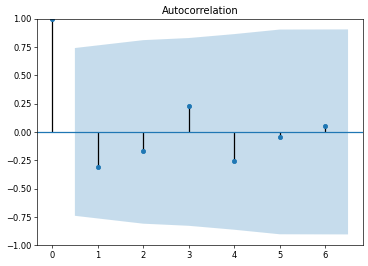

In [14]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':60})

# Original Series
plt.plot(df.TEUs)
plt.title('Original Series')
plot_acf(df.TEUs)
plt.show()
# n st Differencing
n = 1
plt.plot(df.TEUs.diff(n))
plt.title('{}st Order Differencing'.format(n))
plot_acf(df.TEUs.diff(n).dropna())
plt.show()

n = 2
plt.plot(df.TEUs.diff(n))
plt.title('{}st Order Differencing'.format(n))
plot_acf(df.TEUs.diff(n).dropna())
plt.show()

**Order of Differencing**


For the above series, the time series reaches stationarity with one orders of differencing. But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.

So, I am going to tentatively fix the order of differencing as 1 even though the series is not perfectly stationary (weak stationarity).

In [ ]:
pip install pmdarima

In [12]:
from pmdarima.arima.utils import ndiffs
y = df.TEUs

## Adf Test
Adf = ndiffs(y, test='adf') 

# KPSS test
KPSS = ndiffs(y, test='kpss')  

# PP test:
PP = ndiffs(y, test='pp') 

print(Adf,KPSS,PP)

1 0 2


**How to find the order of the AR term (p)**

The next step is to identify if the model needs any AR terms. You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

In [ ]:
# PACF plot 
n = 5
plt.plot(df.TEUs.diff(n))

plot_pacf(df.TEUs.diff(n))

plt.show()

**find the order of the MA term (q)**

Just like how we looked at the PACF plot for the number of AR terms, you can look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

Let’s see the autocorrelation plot of the differenced series.

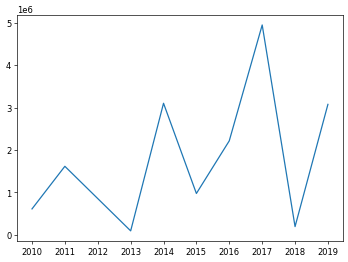

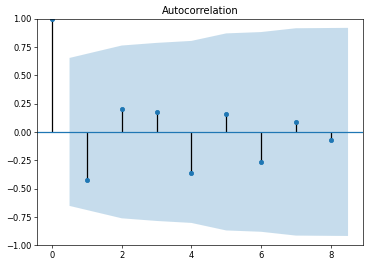

In [24]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
# 
plt.plot(df.TEUs)
plot_acf(df.TEUs.dropna())

plt.show()

Couple of lags are well above the significance line. So, let’s tentatively fix q as ?


# build the ARIMA Model

Now that you’ve determined the values of **p, d and q**, you have everything needed to fit the ARIMA model. Let’s use the `ARIMA()` implementation in `statsmodels` package. 

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [29]:
# 1,0,1 ARIMA Model
model = ARIMA(df.TEUs, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

NotImplementedError: ignored

The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

Notice here the coefficient of the MA2 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

In [92]:
# 1,1,1 ARIMA Model
model = ARIMA(df.TEUs, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: ignored

The model AIC has reduced, which is good. The P Values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using `plot_predict()`.

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

When you set `dynamic=False` the in-sample lagged values are used for prediction.

That is, the model gets trained up until the previous value to make the next prediction. This can make the fitted forecast and actuals look artificially good

Can’t say that at this point because we haven’t actually forecasted into the future and compared the forecast with the actual performance.

** But is that the best?**

So, the real validation you need now is the Out-of-Time cross-validation

**find the optimal ARIMA model manually using Out-of-Time Cross validation**

In Out-of-Time cross-validation, you take few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

To do out-of-time cross-validation, you need to create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio or a reasonable proportion based on time frequency of series.

*Why am I not sampling the training data randomly you ask?*

That’s because the order sequence of the time series should be intact in order to use it for forecasting.

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:85]
test = df.value[85:]

In [ ]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

**Forecast vs Actuals**

From the chart, the ARIMA(1,1,1) model seems to give a directionally correct forecast. And the actual observed values lie within the 95% confidence band. That seems fine.

But each of the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve. So, there is definitely scope for improvement.

So, what I am going to do is to increase the order of differencing to two, that is set `d=2` and iteratively increase `p` to up to `5` and then `q` up to `5` to see which model gives least AIC and also look for a chart that gives closer actuals and forecasts.

**While doing this, I keep an eye on the P values of the AR and MA terms in the model summary. They should be as close to zero, ideally, less than 0.05.**

In [ ]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The AIC has reduced to **440** from **515**. Good. The P-values of the X terms are less the < 0.05, which is great.

Ideally, you should go back multiple points in time, like, go back 1, 2, 3 and 4 quarters and see how your forecasts are performing at various points in the year.

# Accuracy Metrics for Time Series Forecast

* Mean Absolute Percentage Error (MAPE)
* Mean Error (ME)
* Mean Absolute Error (MAE)
* Mean Percentage Error (MPE)
* Root Mean Squared Error (RMSE)
* Lag 1 Autocorrelation of Error (ACF1)
* Correlation between the Actual and the Forecast (corr)
* Min-Max Error (minmax)

*Typically, if you are comparing forecasts of two different series, the MAPE, Correlation and Min-Max Error can be used.*

Why not use the other metrics?

Because only the above three are percentage errors that vary between 0 and 1. That way, you can judge how good is the forecast irrespective of the scale of the series.

The other error metrics are quantities. That implies, an RMSE of 100 for a series whose mean is in 1000’s is better than an RMSE of 5 for series in 10’s. So, you can’t really use them to compare the forecasts of two different scaled time series.

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)